The objective of the Lab is to show how to conduct hypothesis tests in Python

# Task 1: Hypothesis test for two populations

We continue working with ‘Spatial’ datasets from Lab 1.

In [9]:
import pandas as pd
import numpy as np

In [2]:
df_spatial = pd.read_excel('Spatial.xlsx')

In [4]:
df_spatial

,Age group,Subject,No. correct,% correct,City block score,Study time
0,Elderly,1,9,50.0,17,75
1,Elderly,2,8,44.4,15,90
2,Elderly,3,9,50.0,21,40
3,Elderly,4,6,33.3,34,40
4,Elderly,5,5,27.8,35,25
5,Elderly,6,8,44.4,26,30
6,Elderly,7,7,38.9,32,55
7,Elderly,8,8,44.4,36,45
8,Elderly,9,8,44.4,23,35
9,Elderly,10,7,38.9,42,55


Here we are going to test the (null) hypothesis that there is no difference in the performances of the two groups:
- Elderly
- Young.  

We have two measures:
- the number of objects correctly replaced
- the City Block Score that measures the distance between the actual and replaced positions and totals this over the 18 objects.  

These distances are measured as “city blocks” i.e. horizontal and vertical steps across the grid.

Each of these measurements is a discrete variable, so we need to be careful in deciding which tests are appropriate.

## Independent sample t-test

Here we want to compare the **City Block Scores** for the two groups, Elderly and Young.  

The data for the Elderly group are in rows 0-13 of the dataframe, while rows 14-26 contain the data for the Young group.

### Step 1

A t-test assumes that both samples of data are drawn from a population that is Normally distributed. In any way, it is not easy to check Normality when the sample size is small. But we can use rule of thumble to have a rough look at the distribution. `boxplot` is a suitbale appraoch 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

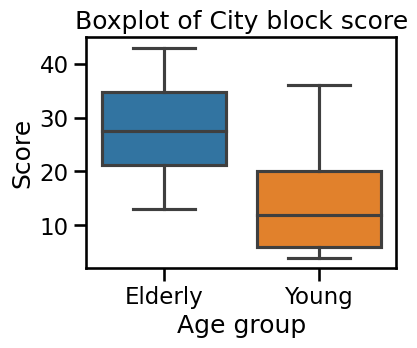

In [7]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='Age group', y='City block score', data=df_spatial)
plt.title('Boxplot of City block score')
plt.xlabel('Age group')
plt.ylabel('Score')
plt.show()

Or if you would like to look at the distribution, then `violin plot` can be used.

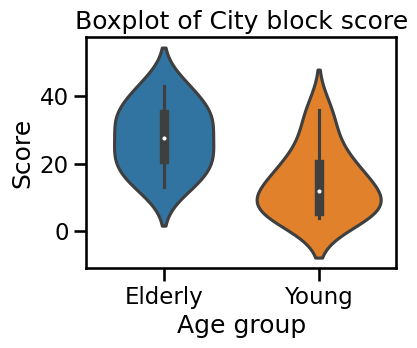

In [8]:
plt.figure(figsize=(4, 3))
sns.violinplot(x='Age group', y='City block score', data=df_spatial)
plt.title('Boxplot of City block score')
plt.xlabel('Age group')
plt.ylabel('Score')
plt.show()

According to both plots, we can see both groups are at least not extremely skewed, and there are so obvious outilers.Therefore, we can probably think the conditions are satistifed.

### Step 2

Let’s test the following hypotheses:
Null hypothesis ($H_0$): the means are the same or $\mu_E = \mu_Y$     
Alternative hypothesis ($H_1$): the means are different or $\mu_E \neq \mu_Y$   

Before we run t-test, we usually need to clarify if the variance is equal or not.

In [25]:
# Select the scores for the elderly and young groups
elderly_scores = df_spatial[df_spatial['Age group'] == 'Elderly']['City block score']
young_scores = df_spatial[df_spatial['Age group'] == 'Young']['City block score']

# Calculate the variance for each group (let's consider it as population variance=)
elderly_variance = elderly_scores.var(ddof=0)  # Population variance
young_variance = young_scores.var(ddof=0)  # Population variance

print(f"Elderly Group Variance: {elderly_variance:.2f}")
print(f"Young Group Variance: {young_variance:.2f}")

Elderly Group Variance: 86.78
Young Group Variance: 90.86


In this code, `ddof=0` is used to calculate the population variance, not the sample variance. If you are dealing with a sample rather than the entire population, you should use `ddof=1`.

### Step 3

The results show that they're quite different!
If `equal`, then run standard t-test;
If `unequal`, then run generaal t-test (also called Welch's t-test)

In [23]:
import scipy.stats as stats 

In [31]:
# Conduct Welch t-test
t_statistic, p_value = stats.ttest_ind(elderly_scores, young_scores, equal_var = False)
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

T-statistic: 3.51
P-value: 0.00


Note that we use `equal_var=False` because we should not assume that the variances of the two groups are equal. This performs Welch's t-test, which does not assume equal population variance.

### Step 4

In [33]:
# Interpret the p-value
alpha = 0.05  # or your chosen level of significance
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the two groups.")

We reject the null hypothesis. There is a significant difference between the two groups.


### Further Questions:

What would change in the analysis if
1. the alternative hypothesis was that the City Block Score for the Elderly was higher than that for the Young
2. the significance level was 1%?
3. we run `t_statistic, p_value = stats.ttest_ind(elderly_scores, young_scores, equal_var = True)`


# Task 2: Hypothesis test for two populations, paired data

In recent years, a growing array of entertainment options competes for consumer time. Cable television and radio surpassed broadcast television, recorded music, and the daily newspaper to become the two entertainment media with the greatest usage. Researchers used a sample of 15 individuals and collected data on the hours per week spent watching cable television and hours per week spent listening to the radio.

The dataset is in `Datasets for Exercise 7.xls`, sheet, `TV Radio q19`, which is Q19 (See Exercise 19)

In [34]:
df_tv_radio = pd.read_excel('Datasets for Exercise 7.xls', 'TV Radio q19')

In [35]:
df_tv_radio

,Individual,Television,Radio
0,1,22,25
1,2,8,10
2,3,25,29
3,4,22,19
4,5,12,13
5,6,26,28
6,7,22,23
7,8,19,21
8,9,21,21
9,10,23,23


### Step 1

In [37]:
# Calculate the difference
df_tv_radio['Difference'] = df_tv_radio['Television'] - df_tv_radio['Radio']

Text(0, 0.5, 'Difference (Television - Radio)')

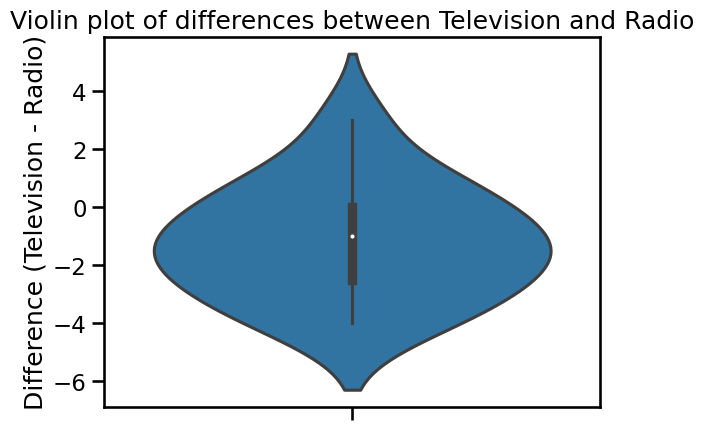

In [39]:
# Plotting the violin plot for differences
sns.violinplot(y=df_tv_radio['Difference'])
plt.title('Violin plot of differences between Television and Radio')
plt.ylabel('Difference (Television - Radio)')

From the view of violin plot, we can see that it looks like bell shape normal distribution without clear outliers. So we can go further!

### Step 2

Formulate the hypothesis:
- Null Hypothesis (H0): There is no significant difference in the mean scores between Television and Radio. This implies that any observed difference is due to random chance. Mathematically, it can be stated as H0: µ_Television = µ_Radio, where µ represents the population mean.
- Alternative Hypothesis (H1): There is a significant difference in the mean scores between Television and Radio. This suggests that the observed difference is not due to chance and is statistically significant.

### Step 3

In [42]:
# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(df_tv_radio['Television'], df_tv_radio['Radio'])
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

T-statistic: -2.36
P-value: 0.033


### Step 4

In [43]:
# Interpret the p-value
alpha = 0.05  # or your chosen level of significance
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the two related groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the two related groups.")

We reject the null hypothesis. There is a significant difference between the two related groups.


### Further Questions

What if:
- Significant level is 1\%
- Look at one-side test

# Further Understanding of Lecture Notes (Optional)

## QQ-Plot vs Histogram 

Note: The code here is not required to understand fully. You can just change some values, and observe the differences between each trial and get further understanding of Lecture Note.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

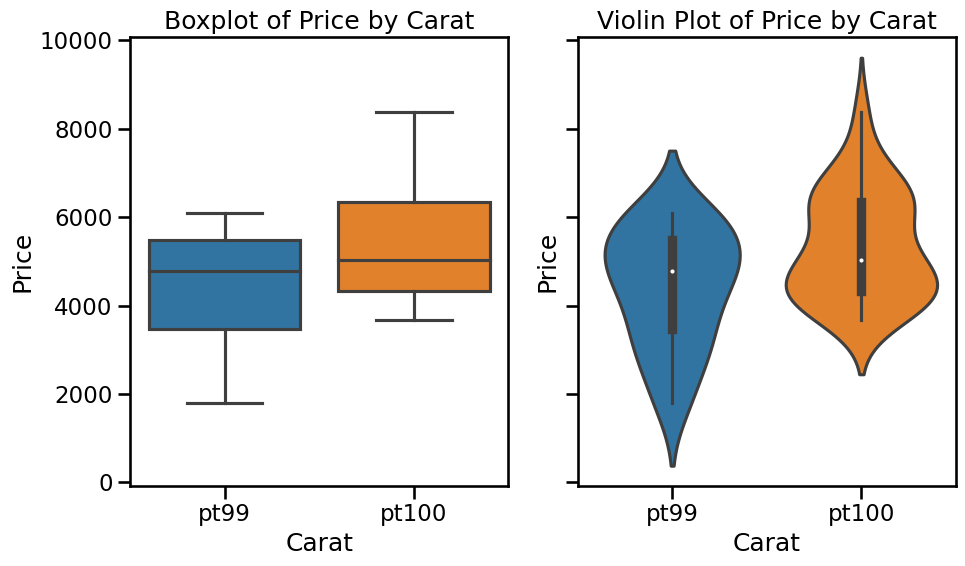

In [22]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Boxplot for 'carat'
sns.boxplot(x='carat', y='price', data=df, ax=axes[0])
axes[0].set_title('Boxplot of Price by Carat')
axes[0].set_xlabel('Carat')
axes[0].set_ylabel('Price')

# Violin plot for 'carat'
sns.violinplot(x='carat', y='price', data=df, ax=axes[1])
axes[1].set_title('Violin Plot of Price by Carat')
axes[1].set_xlabel('Carat')
axes[1].set_ylabel('Price')

# Show the plots
plt.tight_layout()
plt.savefig('box-violin-plot.png')
plt.show()

In [9]:
# Using mixture normal to simulate peaked_data
def mixture_normal(n_samples = 1000, mean1=0, std1=0.5, mean2=0, std2=2, p1=0.8, p2=0.2):
    # Generate samples from each component distribution
    samples1 = np.random.normal(mean1, std1, int(n_samples * p1))
    samples2 = np.random.normal(mean2, std2, int(n_samples * p2))

    # Combine the samples
    combined_samples = np.concatenate([samples1, samples2])
    return combined_samples

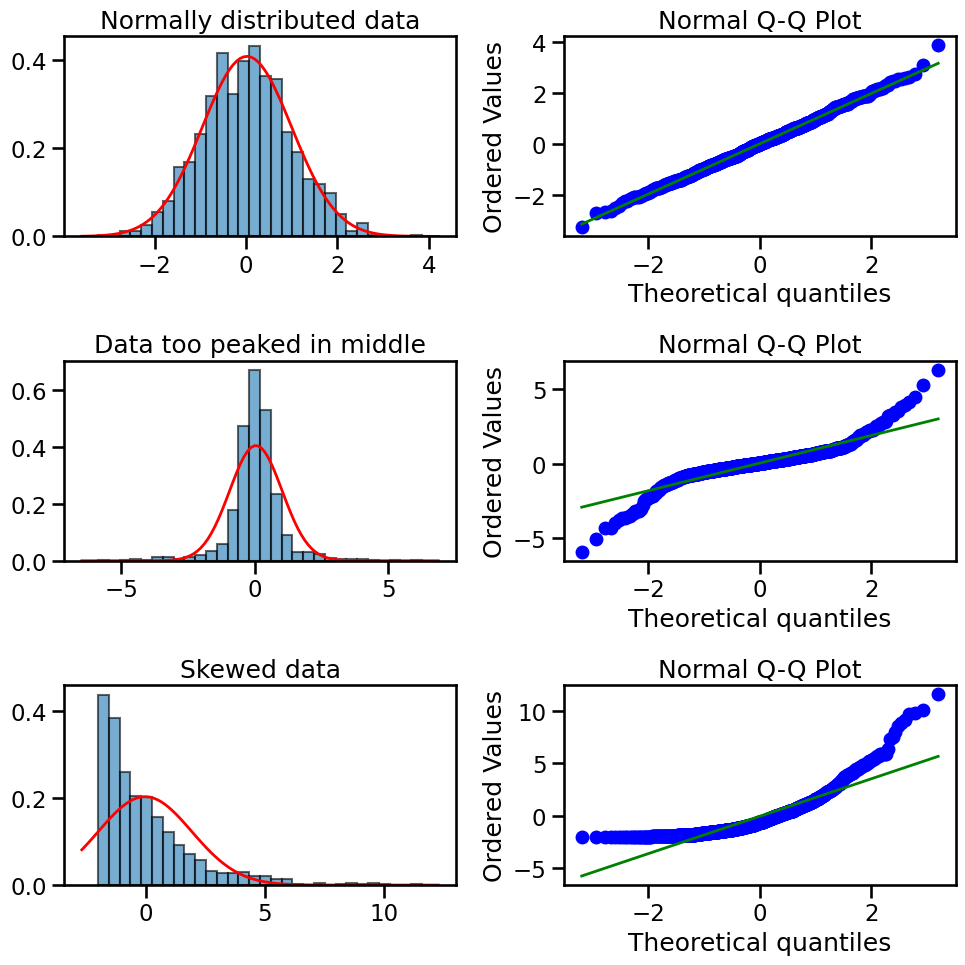

In [11]:
# Generate sample data
np.random.seed(42)
normal_data = np.random.randn(1000)
peaked_data = mixture_normal(1000)
skewed_data = np.random.exponential(scale=2, size=1000) - 2

# Plotting function
def plot_data_and_qq(data, title, ax1, ax2):
    # Plot histogram
    ax1.hist(data, bins=30, density=True, edgecolor='k', alpha=0.6)
    # Plot normal distribution curve on top
    xmin, xmax = ax1.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, np.mean(data), np.std(data))
    ax1.plot(x, p, 'r', linewidth=2)
    ax1.set_title(title)
    
    # Plot Q-Q plot
    stats.probplot(data, dist="norm", plot=ax2)
    ax2.get_lines()[1].set_color('green')
    ax2.get_lines()[1].set_linewidth(2)
    ax2.set_title("Normal Q-Q Plot")

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

plot_data_and_qq(normal_data, "Normally distributed data", axs[0, 0], axs[0, 1])
plot_data_and_qq(peaked_data, "Data too peaked in middle", axs[1, 0], axs[1, 1])
plot_data_and_qq(skewed_data, "Skewed data", axs[2, 0], axs[2, 1])

plt.tight_layout()
# plt.savefig('qq-plot.png')
plt.show()